In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv("sample_submission.csv.zip")
train = pd.read_csv("train.csv.zip")
test = pd.read_csv("test.csv.zip")
df.head(3)

,Id,Response
0,1,8
1,3,8
2,4,8


In [84]:
df.shape

(19765, 2)

In [85]:
df.describe()

,Id,Response
count,19765.000000,19765.0
mean,39772.653883,8.0
std,22942.157493,0.0
min,1.000000,8.0
25%,19792.000000,8.0
50%,39898.000000,8.0
75%,59758.000000,8.0
max,79129.000000,8.0


In [86]:
df.isnull().sum()

Id          0
Response    0
dtype: int64

In [87]:
df["Response"].value_counts()

8    19765
Name: Response, dtype: int64

In [88]:
train.head(3)

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8


In [89]:
for element in train.columns:
    print(element)

Id
Product_Info_1
Product_Info_2
Product_Info_3
Product_Info_4
Product_Info_5
Product_Info_6
Product_Info_7
Ins_Age
Ht
Wt
BMI
Employment_Info_1
Employment_Info_2
Employment_Info_3
Employment_Info_4
Employment_Info_5
Employment_Info_6
InsuredInfo_1
InsuredInfo_2
InsuredInfo_3
InsuredInfo_4
InsuredInfo_5
InsuredInfo_6
InsuredInfo_7
Insurance_History_1
Insurance_History_2
Insurance_History_3
Insurance_History_4
Insurance_History_5
Insurance_History_7
Insurance_History_8
Insurance_History_9
Family_Hist_1
Family_Hist_2
Family_Hist_3
Family_Hist_4
Family_Hist_5
Medical_History_1
Medical_History_2
Medical_History_3
Medical_History_4
Medical_History_5
Medical_History_6
Medical_History_7
Medical_History_8
Medical_History_9
Medical_History_10
Medical_History_11
Medical_History_12
Medical_History_13
Medical_History_14
Medical_History_15
Medical_History_16
Medical_History_17
Medical_History_18
Medical_History_19
Medical_History_20
Medical_History_21
Medical_History_22
Medical_History_23
Medical_Hi

In [90]:
train.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


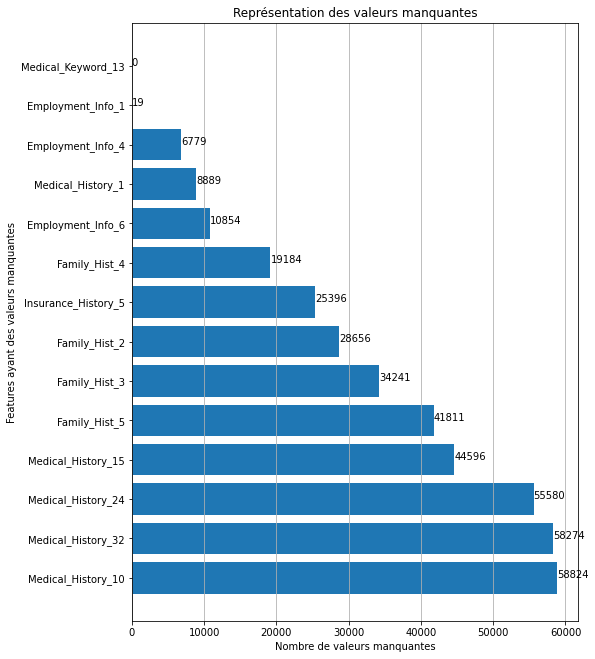

In [91]:
Nan = train.isnull().sum().sort_values(ascending=False).head(14)
plt.figure(figsize=(8,11))
plt.grid(axis = "x")
plt.xlabel("Nombre de valeurs manquantes")
plt.ylabel("Features ayant des valeurs manquantes")
plt.title("Représentation des valeurs manquantes")
plt.barh(Nan.index,Nan)
for i in range(14):
    plt.text(Nan[i],i,Nan[i]);

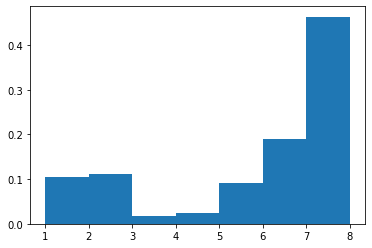

In [93]:
plt.hist(train["Response"], bins=7, density = True );

In [94]:
train.shape

(59381, 128)

In [95]:
test.head(3)

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,...,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,...,0,0,0,0,0,0,0,0,0,0


In [96]:
test.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
count,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,...,19765.000000,19765.000000,19765.00000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000
mean,39772.653883,1.024994,24.321730,0.324381,2.006527,2.655755,1.043410,0.414901,0.705846,0.292557,...,0.013964,0.057324,0.01108,0.045231,0.010068,0.008247,0.013559,0.008601,0.018315,0.056312
std,22942.157493,0.156110,5.184879,0.279439,0.080526,0.754993,0.291445,0.200997,0.074497,0.090343,...,0.117345,0.232466,0.10468,0.207817,0.099837,0.090440,0.115655,0.092345,0.134092,0.230528
min,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.345455,0.083682,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19792.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.253731,0.654545,0.225941,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39898.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.417910,0.709091,0.288703,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,59758.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.582090,0.763636,0.345188,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,79129.000000,2.000000,37.000000,1.000000,3.000000,3.000000,3.000000,0.970149,1.000000,0.878661,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
test.shape

(19765, 127)

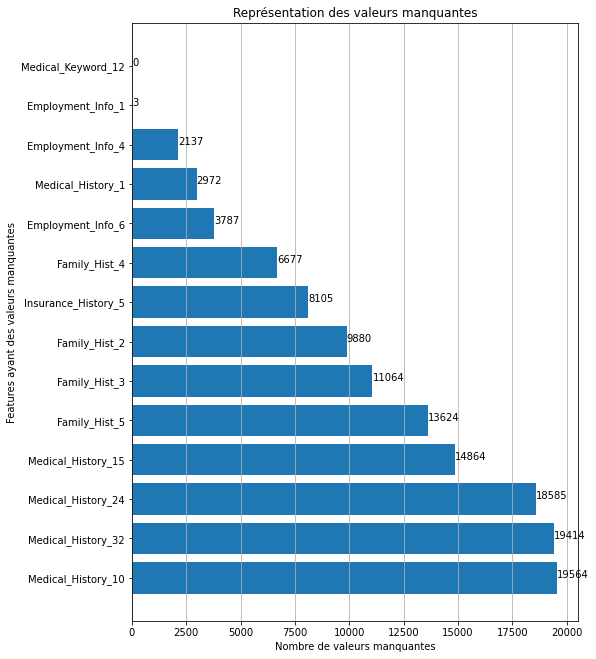

In [79]:
Nantest = test.isnull().sum().sort_values(ascending=False).head(14)
plt.figure(figsize=(8,11))
plt.grid(axis = "x")
plt.xlabel("Nombre de valeurs manquantes")
plt.ylabel("Features ayant des valeurs manquantes")
plt.title("Représentation des valeurs manquantes")
plt.barh(Nantest.index,Nantest)
for i in range(14):
    plt.text(Nantest[i],i,Nantest[i]);

In [80]:
test.shape

(19765, 127)